In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

heart_data = pd.read_csv('./data/train.csv')
heart_data.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
1,2,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
2,3,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
3,4,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
4,5,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1


In [2]:
def check_missing_col(dataframe):
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.')

    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')

check_missing_col(heart_data)

결측치가 존재하지 않습니다


In [3]:
X = heart_data.iloc[:, 1:-1] # id와 target을 제거
y = heart_data.iloc[:, -1] # target만 선택

In [4]:
logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(X, y)

logistic_preds = logistic_regression_model.predict(X)

print(f'accuracy: {sum(logistic_preds == y) / len(y)}')
print(f'f1_score : {f1_score(y, logistic_preds)}')

accuracy: 0.8807947019867549
f1_score : 0.8953488372093023


In [5]:
heart_data['preds'] = logistic_preds # dataframe에 예측값 삽입

predict_positive = heart_data[heart_data['preds'] == 1] # 심장병이 있다 예측한 데이터
predict_negative = heart_data[heart_data['preds'] == 0] # 심장병이 없다 예측한 데이터

true_positive = predict_positive[predict_positive['target'] == 1] # 심장병이 있다고 예측한 데이터에서 실제로 심장병이 있는 사람들의 데이터
false_positive = predict_positive[predict_positive['target'] == 0] # 심장병이 있다고 예측한 데이터에서 실제로는 심장병이 없는 사람들의 데이터

true_negative = predict_negative[predict_negative['target'] == 0] # 심장병이 없다고 예측한 데이터에서 실제로 심장병이 없는 사람들의 데이터
false_negetive = predict_negative[predict_negative['target'] == 1] # 심장병이 없다고 예측한 데이터에서 실제로는 심장병이 있는 사람들의 데이터



# 정밀도: 모델이 심장병이 있다고 예측한 사람들중 실제로 심장병이 있는 사람의 비율
precision = len(true_positive) / (len(true_positive) + len(false_positive))

# 재현율 : 실제로 심장병이 있는 사람들중 모델이 심장병이 있다 예측한 사람의 비율
recall = len(true_positive) / (len(true_positive) + len(false_negetive))

f1 = 2 * precision * recall / (precision + recall)


print(f'정밀도: {precision}')
print(f'재현율: {recall}')
print(f'f1 스코어: {f1}')

정밀도: 0.8651685393258427
재현율: 0.927710843373494
f1 스코어: 0.8953488372093023


Text(0.5, 1.0, 'Confusion matrix')

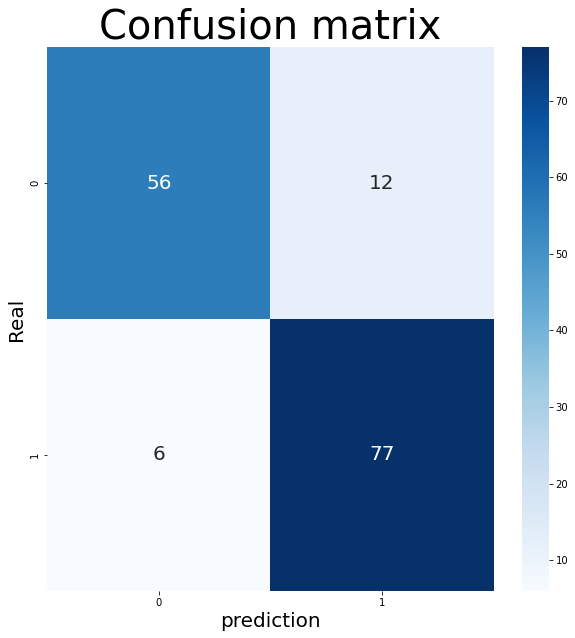

In [6]:
confusion_matrix = np.array([[len(true_negative), len(false_positive)], 
                             [len(false_negetive), len(true_positive)]])
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, annot=True, annot_kws={'fontsize': 20}, cmap='Blues')
plt.xlabel('prediction', fontsize=20)
plt.ylabel('Real', fontsize=20)
plt.title('Confusion matrix', fontsize = 40)

In [7]:
false_negetive # 모델이 심장병이 없다 예측하였지만 실제로 심장병이 있는 사람들의 데이터

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,preds
22,23,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1,0
110,111,57,1,0,132,207,0,1,168,1,0.0,2,0,3,1,0
111,112,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1,0
139,140,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1,0
140,141,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1,0
145,146,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1,0


In [9]:
false_positive # 모델이 심장병이 있다 예측하였지만 실제로 심장병이 없는 사람들의 데이터

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,preds
7,8,60,1,2,140,185,0,0,155,0,3.0,1,0,2,0,1
27,28,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0,1
30,31,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0,1
37,38,52,1,0,112,230,0,1,160,0,0.0,2,1,2,0,1
48,49,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1
49,50,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0,1
50,51,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0,1
64,65,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0,1
74,75,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0,1
93,94,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0,1


In [11]:
test_set = pd.read_csv('./data/test.csv')
test_set.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1,57,1,0,150,276,0,0,112,1,0.6,1,1,1
1,2,59,1,3,170,288,0,0,159,0,0.2,1,0,3
2,3,57,1,2,150,126,1,1,173,0,0.2,2,1,3
3,4,56,0,0,134,409,0,0,150,1,1.9,1,2,3
4,5,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [13]:
test_X = test_set.iloc[:, 1:] #id 제외 후 모든 데이터를 사용 

test_preds = logistic_regression_model.predict(test_X)

submission = pd.read_csv('./data/sample_submission.csv')
submission['target'] = test_preds

submission.to_csv('baseline.csv', index=False)